In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
cd drive/MyDrive

/content/drive/MyDrive


In [4]:
pip install -U tensorflow-addons

     |████████████████████████████████| 706kB 3.8MB/s 


In [8]:
import tensorflow as tf

import keras
import keras.utils
from keras import backend as K
import numpy as np
# %matplotlib inline
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image

from time import time
from time import sleep
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
# import necessary building blocks
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Activation
from keras.layers import Dropout,Activation
from keras.layers.advanced_activations import LeakyReLU
import numpy as np
from keras.models import *
from keras.layers import BatchNormalization,Input,Conv2D,Activation
from keras.layers import concatenate,Lambda,Subtract,Add,merge
from keras.layers import GlobalAveragePooling1D


import keras.backend as K
from keras.models import load_model

import pandas as pd
import pprint

# fit model
import tensorflow_addons as tfa
import keras.utils
from keras.callbacks import ModelCheckpoint

from numpy import loadtxt

2.4.1
2.4.3


In [9]:
folder = "new_train/noisy"

onlyfiles1 = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print(len(onlyfiles1))
input_train_files=sorted(onlyfiles1)

image_width=180
image_height=180

channels = 3

X_train = np.ndarray(shape=(len(input_train_files),image_height, image_width,channels),
                     dtype=np.int32)

i = 0

for every_file in input_train_files:
    try:
        # PIL image
        img=load_img(folder+"/"+every_file)  
    except :
       print(_file)
       continue
    #print(img)
    
    # Convert to Numpy Array
    x = img_to_array(img)  
    x = x.reshape((180, 180,3)).astype(int)
    
    
    X_train[i] = x
    i += 1
    if i % 250 == 0:
        print("%d images to array" % i)
    
print("All images to array!")

folder = "new_train/color"

onlyfiles2 = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

output_train_files=sorted(onlyfiles2)
print(len(output_train_files))

image_width=180
image_height=180

channels = 3

y_train = np.ndarray(shape=(len(output_train_files),image_height, image_width,channels),
                     dtype=np.int32)

i = 0

for _file in output_train_files:
    
    # PIL image 
    img=load_img(folder+"/"+every_file)  
    
    # Convert to Numpy Array
    x = img_to_array(img)  
    x = x.reshape((180, 180,3)).astype(int)
    
    
    y_train[i] = x
    i += 1
    if i % 250 == 0:
        print("%d images to array" % i)
    
print("All images to array!")

5544
250 images to array
500 images to array
750 images to array
1000 images to array
1250 images to array
1500 images to array
1750 images to array
2000 images to array
2250 images to array
2500 images to array
2750 images to array
3000 images to array
3250 images to array
3500 images to array
3750 images to array
4000 images to array
4250 images to array
4500 images to array
4750 images to array
5000 images to array
5250 images to array
5500 images to array
All images to array!
5544
250 images to array
500 images to array
750 images to array
1000 images to array
1250 images to array
1500 images to array
1750 images to array
2000 images to array
2250 images to array
2500 images to array
2750 images to array
3000 images to array
3250 images to array
3500 images to array
3750 images to array
4000 images to array
4250 images to array
4500 images to array
4750 images to array
5000 images to array
5250 images to array
5500 images to array
All images to array!


In [10]:
cd finalsigma

/content/drive/My Drive/finalsigma


In [11]:
X_train.shape

(5544, 180, 180, 3)

In [12]:
y_train.shape

(5544, 180, 180, 3)

In [13]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1)

In [14]:
X_train.shape

(4989, 180, 180, 3)

In [15]:
def ProposedNet():
  inpt=Input(shape=(180,180,3))
  x=Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same')(inpt)
  x=BatchNormalization(axis=-1,epsilon=1e-3)(x)
  x=Activation('relu')(x)
  for i in range(7):
    x=Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same')(x)
    x=BatchNormalization(axis=-1,epsilon=1e-3)(x)
    x=Activation('relu')(x) 

  x=Conv2D(filters=3,kernel_size=(3,3),strides=(1,1),padding='same')(x)
  x=Subtract()([inpt,x])
  y=Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same')(inpt)
  y=BatchNormalization(axis=-1,epsilon=1e-3)(y)
  y=Activation('relu')(y)
  for i in range(7):
    y=Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),dilation_rate=(2,2),padding='same')(y)
    y=Activation('relu')(y) 
  y=Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same')(y)
  y=BatchNormalization(axis=-1, epsilon=1e-3)(y)
  y=Activation('relu')(y) 

  y = Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='same')(y)#gray is 1 color is 3
  y = Subtract()([inpt, y])   # input - noise
  o = concatenate([x,y],axis=-1)
  z = Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='same')(o)#gray is 1 color is 3
  z=  Subtract()([inpt, z])
  print(z.shape)
  model = Model(inpt, outputs=z)
  return model

In [16]:
model = ProposedNet()
model.summary()

(None, 180, 180, 3)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 180, 180, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 180, 180, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 180, 180, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 180, 180, 64) 0           batch_normalization[0][0]        
__________________________________________________________________________

In [17]:
INIT_LR = 1e-3  # initial learning rate
BATCH_SIZE = 20
EPOCHS = 50

def PSNR(y_true, y_pred):
    max_pixel = 255.0
    return tf.image.psnr(y_true,y_pred,max_val=max_pixel)

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='mse',  # we train 10-way classification
    optimizer=keras.optimizers.Adamax(lr=INIT_LR),  # for SGD
     metrics=[PSNR]# report accuracy during training
)

# scheduler of learning rate (decay with epochs)
def step_decay(epoch):
    
    initial_lr = INIT_LR
    if epoch<30:   
        lr= initial_lr
    else:
        lr = initial_lr/10
    
    return lr

# callback for printing of actual learning rate used by optimizer
class LrHistory(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
        print("Learning rate:", K.get_value(model.optimizer.lr))

filepath="weights-improvement-{epoch:02d}.hdf5"
last_finished_epoch = None

last_finished_epoch = 43  
model.load_weights(filepath.format(epoch=last_finished_epoch))




In [ ]:
checkpoint = ModelCheckpoint(filepath, monitor='val_PSNR', verbose=1, save_best_only=True, mode='max')
last_finished_epoch=None

history=model.fit(
    X_train, y_train,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[keras.callbacks.LearningRateScheduler(step_decay), 
               LrHistory(), 
               tfa.callbacks.TQDMProgressBar(),
               checkpoint
               ],
    validation_data=(X_val, y_val),
    shuffle=True,
    verbose=0,
    initial_epoch=0
   )
model.save("model.h5")
print("Saved model to disk")
history_df=pd.DataFrame(history.history)
history_df.to_csv('History2.csv')

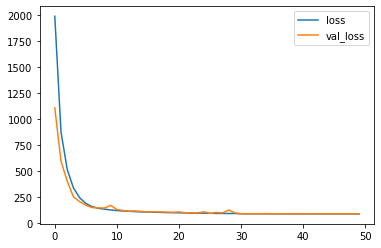

In [18]:
history_df=pd.read_csv('History2.csv')
history_df.loc[:,['loss','val_loss']].plot()

   Unnamed: 0         loss       PSNR     val_loss   val_PSNR     lr
0           0  1992.238281  16.723698  1108.817871  18.867228  0.001
1           1   877.584167  19.948898   595.772339  21.566544  0.001
2           2   517.052917  22.230173   404.320648  23.357613  0.001
3           3   339.039825  24.075659   252.533386  25.486250  0.001
4           4   244.213577  25.506668   207.017776  26.216522  0.001


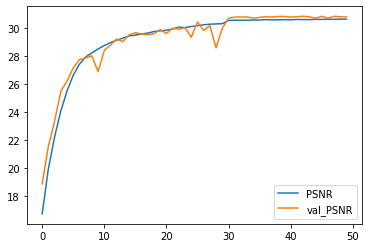

In [19]:
print(history_df.head())
history_df.loc[:,['PSNR','val_PSNR']].plot()